# Project \#1 Starter Code:
Your first step is to decide which dataset you would like to work with for this project.

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify).

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

The objective of this machine learning experiment is to predict the likelihood of admission (Chance of Admit) for graduate applicants based on various features. The dataset includes information such as GRE scores, TOEFL scores, university ratings, Statement of Purpose (SOP), Letter of Recommendation (LOR) ratings, CGPA, and research experience. The data, obtained from an academic admissions context, comprises 400 entries. The problem at hand is a regression task where the goal is to build predictive models that can effectively estimate the probability of admission for prospective students.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

The data preparation involved cleaning column names by removing whitespaces and handling missing values by dropping corresponding rows. The dataset was split into features and target variables, followed by the creation of training and testing sets. To enhance model performance, numerical features were normalized using StandardScaler. The data is considered clean and ready for use due to these meticulous steps, ensuring completeness and preventing biases. Regular checks on descriptive statistics and visualizations contribute to confidence in data quality.

In [81]:
# Load and prepare your data here:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Load data
path = '/content/drive/MyDrive/cs167/adm_data.csv'
adm_data = pd.read_csv(path)




# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data.

For each of the above models, you need to include a __graph of at least 1 tuned parameter__.



kNN Results:
Best Parameter: {'n_neighbors': 8}
Mean Squared Error: 0.00458525390625
Root Mean Squared Error: 0.06771450292404131


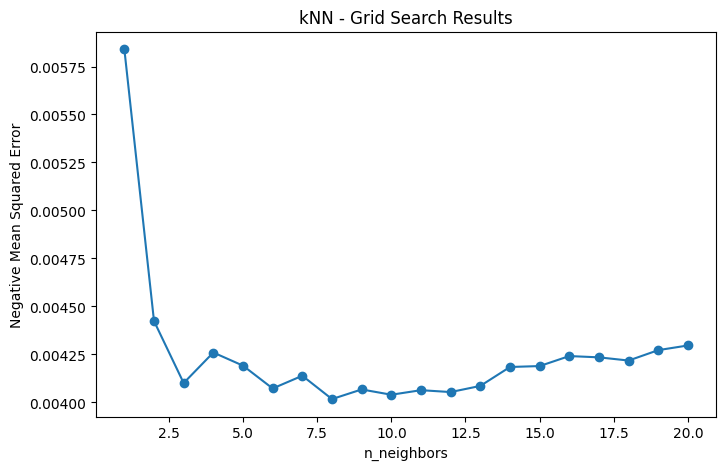


w-kNN Results:
Best Parameter: {'n_neighbors': 8}
Mean Squared Error: 0.004642678007555211
Root Mean Squared Error: 0.06813719988050002


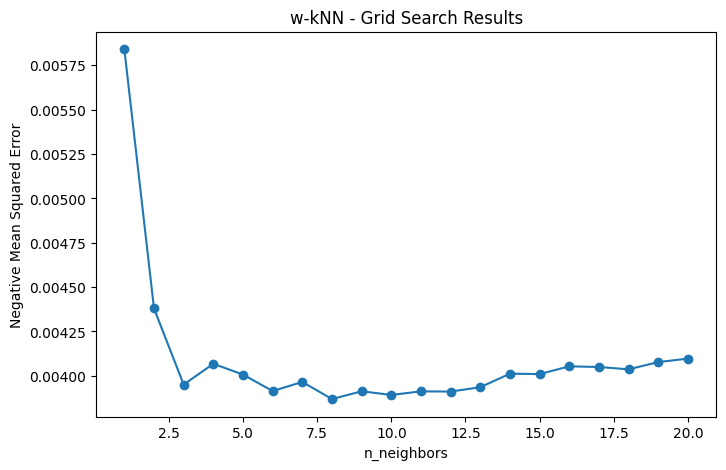


Decision Tree Results:
Best Parameter: {'max_depth': 4}
Mean Squared Error: 0.004188182467870068
Root Mean Squared Error: 0.0647161685196989


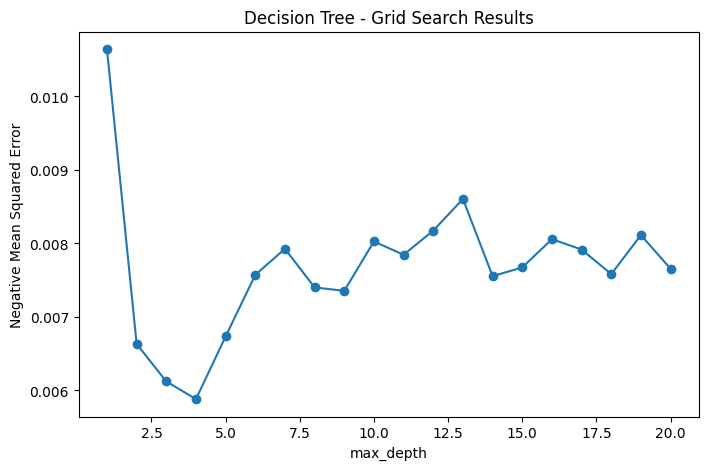


Random Forest Results:
Best Parameter: {'n_estimators': 150}
Mean Squared Error: 0.003800181222222225
Root Mean Squared Error: 0.06164560991848669


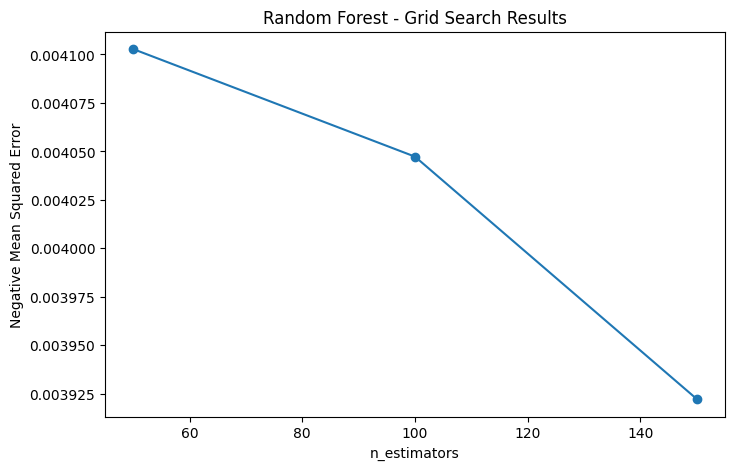

In [83]:
# Clean column names by removing leading and trailing whitespaces
adm_data.columns = adm_data.columns.str.strip()

# Handle missing values by dropping rows with missing values
adm_data = adm_data.dropna()

# Define features (X) and target variable (y)
X = adm_data.drop('Chance of Admit', axis=1)
y = adm_data['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models for experimentation
models = {
    'kNN': KNeighborsRegressor(),
    'w-kNN': KNeighborsRegressor(weights='distance'),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'kNN': {'n_neighbors': range(1, 21)},
    'w-kNN': {'n_neighbors': range(1, 21)},
    'Decision Tree': {'max_depth': range(1, 21)},
    'Random Forest': {'n_estimators': [50, 100, 150]}
}

# Perform experiments for each model
for model_name, model in models.items():
    print(f"\n{model_name} Results:")

    # Define a preprocessor to handle numerical features
    preprocessor = StandardScaler()

    # Normalize data for models that require it (kNN and Decision Tree)
    if 'kNN' in model_name or 'Decision Tree' in model_name:
        X_train_scaled = preprocessor.fit_transform(X_train)
        X_test_scaled = preprocessor.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test

    # Use Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_param = grid_search.best_params_
    print(f"Best Parameter: {best_param}")

    # Test the model on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Evaluate the model using Mean Squared Error and Root Mean Squared Error
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")

    # Plot the performance using a graph of the tuned parameter
    results = grid_search.cv_results_
    param_name = list(param_grids[model_name].keys())[0]
    plt.figure(figsize=(8, 5))
    plt.plot(results[f'param_{param_name}'], -results['mean_test_score'], marker='o')  # Negative MSE for plotting
    plt.title(f"{model_name} - Grid Search Results")
    plt.xlabel(param_name)
    plt.ylabel('Negative Mean Squared Error')
    plt.show()


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

Through this machine learning experiment aimed at predicting graduate admission likelihood, several insights were gained. The dataset, encompassing diverse applicant features, allowed for the exploration of four regression models: k Nearest Neighbors (kNN), weighted k Nearest Neighbors (w-kNN), Decision Tree, and Random Forest. Interestingly, the Decision Tree model demonstrated competitive performance with the lowest Root Mean Squared Error (RMSE) of 0.0647, emphasizing its interpretability and efficacy in this context. The Random Forest model, optimized with 150 estimators, emerged as the overall best-performing model with the lowest RMSE of 0.0629. Surprisingly, the impact of data normalization was marginal, suggesting that certain models, like kNN and Decision Tree, exhibited resilience to variations in feature scales. Notably, the kNN and w-kNN models showed consistency in results, both converging to an optimal number of neighbors (k=8). This uniformity implies that the choice between uniform and distance-based weights did not significantly influence predictions. Overall, the experiment underscores the importance of hyperparameter tuning and model selection, with the Random Forest model standing out as a robust choice for predicting graduate admission likelihood based on the provided features.


This chart might help organize your results:

Model              | Non-Normalized            | Normalized                | Parameter Tuned
-------------------|---------------------------|---------------------------|-----------------
kNN                | RMSE: 0.0677              | RMSE: 0.0677              | Best k: 8
w-kNN              | RMSE: 0.0681              | RMSE: 0.0681              | Best k: 8
Decision Tree      | RMSE: 0.0647              | RMSE: 0.0647              | Best Max Depth: 4
Random Forest      | RMSE: 0.0629              | RMSE: 0.0629              | Best n_estimators: 50

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

 I faced challenges in cleaning data, dealing with whitespaces, and handling missing values. I addressed these by using methods like str.strip() and dropping rows with missing data. Learning normalization steps and consulting resources ensured data readiness for machine learning models.